<a href="https://colab.research.google.com/github/AsifIqbal123-cyber/machinelearning/blob/main/practice_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


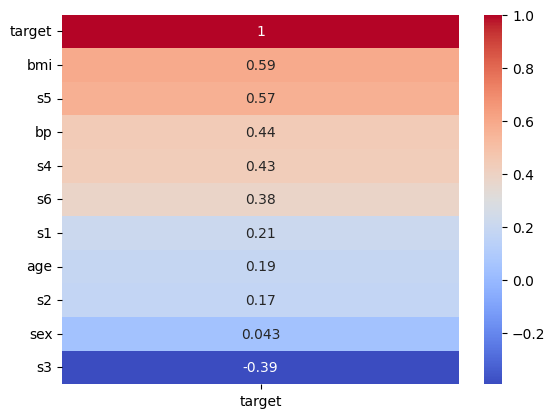

In [193]:
import torch
from torch import nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

X, y = datasets.load_diabetes(return_X_y=True)


df = pd.DataFrame(X, columns= datasets.load_diabetes().feature_names)
df["target"] = y
print(df.head())
# Correlation heatmap

corr = df.corr(numeric_only=True)
sns.heatmap(corr[["target"]].sort_values(by="target", ascending=False), annot=True, cmap="coolwarm")
plt.show()


X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1,1)

# X_tensor = torch.tensor(X)
# y_tensor = torch.tensor(y)

# X = X[:, :2]
X = X[:,np.newaxis, 2]


train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

In [194]:
len(X_train), len(y_train), len(X_test), len(y_test)

(353, 353, 89, 89)

In [195]:
X_train.shape, y_train.shape

(torch.Size([353, 1]), torch.Size([353, 1]))

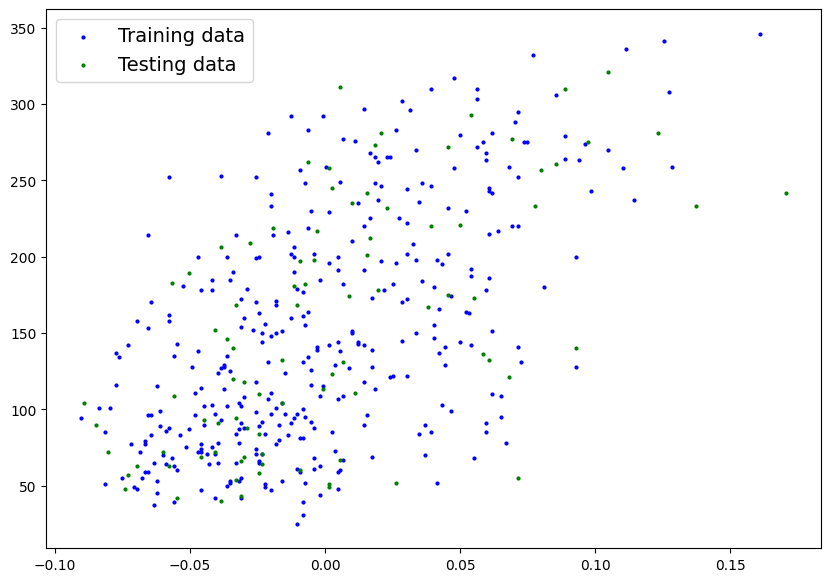

In [196]:
plt.figure(figsize=(10,7))


feature_index = 0
plt.scatter(X_train[:,feature_index], y_train, c="b", s=4, label="Training data")

plt.scatter(X_test[:,feature_index], y_test, c="g", s=4, label="Testing data")

plt.legend(prop={"size": 14});

In [197]:
plt.show()

In [198]:
def ReLU(x):
  return max(0,x)

from torch import nn
ReLU = nn.ReLU()

In [199]:
model = nn.Sequential(
    nn.Linear(1,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

In [200]:
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
epochs =400

train_loss_values = []
test_loss_values = []
epcoh_count = []


dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


for epoch in range(epochs):
  for X_batch, y_batch in dataloader:
    model.train()

    y_pred = model(X_batch)

    optimizer.zero_grad()

    loss = loss_fn(y_pred, y_batch)


    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test).squeeze()
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epcoh_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 30687.265625 | MAE Test Loss: 30406.326171875 
Epoch: 0 | MAE Train Loss: 28337.119140625 | MAE Test Loss: 30403.642578125 
Epoch: 0 | MAE Train Loss: 36659.62109375 | MAE Test Loss: 30400.953125 
Epoch: 0 | MAE Train Loss: 21939.904296875 | MAE Test Loss: 30398.2890625 
Epoch: 0 | MAE Train Loss: 29586.49609375 | MAE Test Loss: 30395.623046875 
Epoch: 0 | MAE Train Loss: 23668.87890625 | MAE Test Loss: 30392.958984375 
Epoch: 0 | MAE Train Loss: 28900.36328125 | MAE Test Loss: 30390.29296875 
Epoch: 0 | MAE Train Loss: 32378.275390625 | MAE Test Loss: 30387.603515625 
Epoch: 0 | MAE Train Loss: 20548.89453125 | MAE Test Loss: 30384.9375 
Epoch: 0 | MAE Train Loss: 33558.4921875 | MAE Test Loss: 30382.271484375 
Epoch: 0 | MAE Train Loss: 28377.291015625 | MAE Test Loss: 30379.625 
Epoch: 0 | MAE Train Loss: 91236.1328125 | MAE Test Loss: 30376.94140625 
Epoch: 10 | MAE Train Loss: 28628.5234375 | MAE Test Loss: 29500.880859375 
Epoch: 10 | MAE Train Loss: 23

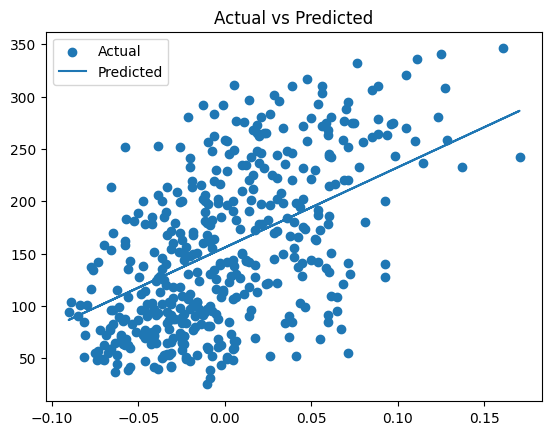

In [201]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

with torch.inference_mode():
  y_all_pred = model(X).squeeze()


plt.scatter(X.numpy(), y.numpy(), label="Actual")
plt.plot(X.numpy(), y_all_pred.numpy(), label="Predicted")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()